<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-gerardoaaron_castanedajaramillo/blob/main/Actividad%20Semanal%20--%207%20Regresiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [126]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
487,4.399514,37.567914
906,6.193682,33.355932
470,4.325755,38.136724
93,2.756427,46.838555
332,3.925889,35.303587
565,4.645377,38.367271
735,5.283807,28.928129
807,5.563938,30.078892
392,4.117804,29.964328
100,2.769290,51.463569


In [127]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [128]:
len(X)

1000

In [129]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

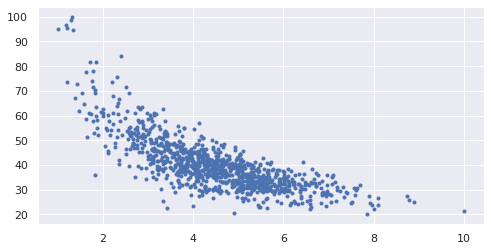

In [130]:
plt.plot(X,y,'b.')

In [131]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 1000
**************************************************
Numero total de registros en el training set: 900
Tamaño de X_train: (900, 1)
**************************************************
Mumero total de registros en el test dataset: 100
Tamaño del X_test: (100, 1)


### Regresión Lineal

Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

* Modelo generado (ecuación)

Entrenamos el modelo:

In [133]:
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

LinearRegression()

Obtenemos coeficientes e intercepción con el eje:

In [134]:
def coef_inter(model):
  print('Coeficientes:', model.coef_)
  print('Intercept:', model.intercept_)

In [135]:
coef_inter(linear_reg)

Coeficientes: [-5.98882699]
Intercept: 66.83650741226988


Obtenemos sus predicciones para datos de entrenamiento, y datos de prueba:

In [136]:
def predict_ys(model,xt,xp):
  return model.predict(xt), model.predict(xp)

In [137]:
yhat_train, yhat_test = predict_ys(linear_reg, X_train, X_test)

* Visualización

In [138]:
def visualizacion(x_p, y_p, x_model, y_model):
  plt.scatter(x_p, y_p)
  plt.plot(x_model, y_model, "r-", linewidth=2, label="Predictions")
  plt.xlabel("$X$", fontsize=18)
  plt.ylabel("$y$", rotation=0, fontsize=18)
  plt.legend(loc="upper left", fontsize=14);

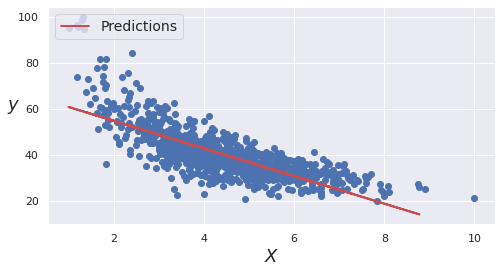

In [139]:
visualizacion(X, y, X_test, yhat_test)

* Sus errores y r cuadrada

In [140]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [141]:
def errores(y_train, yhat_train, y_test, yhat_test):
  errores_train = list()
  errores_train.append(metrics.mean_absolute_error(y_train, yhat_train))
  errores_train.append(np.sqrt(metrics.mean_squared_error(y_train, yhat_train)))
  errores_train.append(r2_score(y_train, yhat_train))
  errores_train.append(y_train - yhat_train)

  errores_test = list()
  errores_test.append(metrics.mean_absolute_error(y_test, yhat_test))
  errores_test.append(np.sqrt(metrics.mean_squared_error(y_test, yhat_test)))
  errores_test.append(r2_score(y_test, yhat_test))
  errores_test.append(y_test - yhat_test)

  return errores_train, errores_test

In [142]:
error_ejercicio1_train = list()
error_ejercicio1_test = list()

errores_test = list()
nom_errores = ['MAE', 'RMSE', 'R2']

errores_train = list()
errores_test = list()
errores_train, errores_test = errores(y_train,yhat_train,y_test,yhat_test)
error_ejercicio1_train.append(errores_train)
error_ejercicio1_test.append(errores_test)

i = 0
for error in nom_errores:
  print(error, 'de train:', errores_train[i])
  i = i + 1
i = 0
for error in nom_errores:
  print(error, 'de train:', errores_test[i])
  i = i + 1

MAE de train: 4.905332101451236
RMSE de train: 6.844866083710475
R2 de train: 0.5746524649404298
MAE de train: 5.013587781954963
RMSE de train: 7.108963321847682
R2 de train: 0.6116251549562579


### Regresión Polinomial

Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

* Modelo generado (ecuación)

In [143]:
from sklearn.preprocessing import PolynomialFeatures

In [144]:
def poly_transform(x, xt, xp, deg):
  poly_features = PolynomialFeatures(degree=deg, include_bias=False)
  X_poly = poly_features.fit(x)
  return X_poly.transform(xt), X_poly.transform(xp)

In [145]:
X_poly_train, X_poly_test = poly_transform(X, X_train, X_test, 2)

In [146]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly_train, y_train)

LinearRegression()

In [147]:
coef_inter(lin_reg)

Coeficientes: [-16.40638102   1.13136095]
Intercept: 88.80179909112496


Obtenemos sus predicciones para datos de entrenamiento, y datos de prueba:

In [148]:
yhat_train, yhat_test = predict_ys(lin_reg, X_poly_train, X_poly_test)

* Visualización

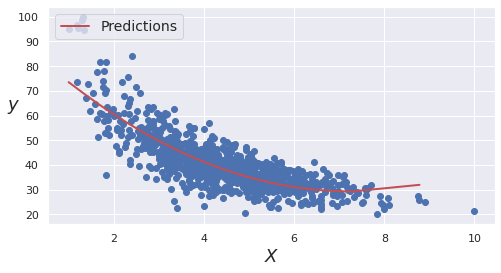

In [149]:
order = np.argsort(X_test.values.ravel())
sortedX = X_test.values.ravel()[order]
sortedY = y_test.values[order]
sorted_pred = yhat_test[order]

visualizacion(X, y, sortedX, sorted_pred)

* Sus errores y r cuadrada

In [150]:
errores_train = list()
errores_test = list()
errores_train, errores_test = errores(y_train,yhat_train,y_test,yhat_test)
error_ejercicio1_train.append(errores_train)
error_ejercicio1_test.append(errores_test)

i = 0
for error in nom_errores:
  print(error, 'de train:', errores_train[i])
  i = i + 1
i = 0
for error in nom_errores:
  print(error, 'de train:', errores_test[i])
  i = i + 1

MAE de train: 4.545086474348086
RMSE de train: 6.162532575212149
R2 de train: 0.6552276217097528
MAE de train: 4.3833025759681075
RMSE de train: 5.832771301068423
R2 de train: 0.7385501224942537


### Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

### Ridge

In [151]:
from sklearn.linear_model import Ridge

* Modelo generado (ecuación)

In [152]:
X_poly_train, X_poly_test = poly_transform(X, X_train, X_test, 2)

In [153]:
ridge_model = Ridge(alpha = 10)
ridge_model.fit(X_poly_train, y_train)

Ridge(alpha=10)

In [154]:
coef_inter(ridge_model)

Coeficientes: [-14.35249765   0.91811959]
Intercept: 84.25748545190552


Obtenemos sus predicciones para datos de entrenamiento, y datos de prueba:

In [155]:
yhat_train, yhat_test = predict_ys(ridge_model, X_poly_train, X_poly_test)

* Visualización

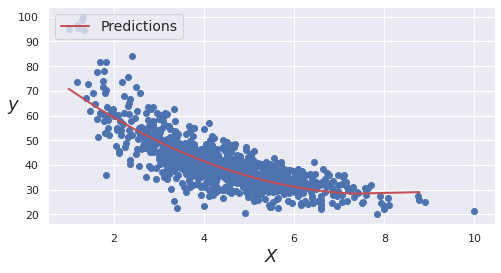

In [156]:
order = np.argsort(X_test.values.ravel())
sortedX = X_test.values.ravel()[order]
sortedY = y_test.values[order]
sorted_pred = yhat_test[order]

visualizacion(X, y, sortedX, sorted_pred)

* Sus errores y r cuadrada

In [157]:
errores_train = list()
errores_test = list()
errores_train, errores_test = errores(y_train,yhat_train,y_test,yhat_test)
error_ejercicio1_train.append(errores_train)
error_ejercicio1_test.append(errores_test)

i = 0
for error in nom_errores:
  print(error, 'de train:', errores_train[i])
  i = i + 1
i = 0
for error in nom_errores:
  print(error, 'de train:', errores_test[i])
  i = i + 1

MAE de train: 4.517916499060817
RMSE de train: 6.189226153362644
R2 de train: 0.6522343261500281
MAE de train: 4.397899036894618
RMSE de train: 5.979429627583081
R2 de train: 0.7252371174424325


### Lasso

In [158]:
from sklearn.linear_model import Lasso

* Modelo generado (ecuación)

In [159]:
X_poly_train, X_poly_test = poly_transform(X, X_train, X_test, 2)

In [160]:
lasso_model = Lasso(alpha = 0.1)
lasso_model.fit(X_poly_train, y_train)

Lasso(alpha=0.1)

In [161]:
coef_inter(lasso_model)

Coeficientes: [-14.9666674    0.98129183]
Intercept: 85.62928041192495


Obtenemos sus predicciones para datos de entrenamiento, y datos de prueba:

In [162]:
yhat_train, yhat_test = predict_ys(lasso_model, X_poly_train, X_poly_test)

* Visualización

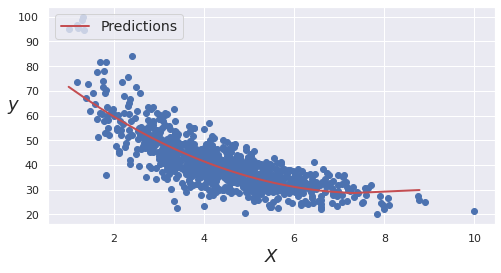

In [163]:
order = np.argsort(X_test.values.ravel())
sortedX = X_test.values.ravel()[order]
sortedY = y_test.values[order]
sorted_pred = yhat_test[order]

visualizacion(X, y, sortedX, sorted_pred)

* Sus errores y r cuadrada

In [164]:
errores_train = list()
errores_test = list()
errores_train, errores_test = errores(y_train,yhat_train,y_test,yhat_test)
error_ejercicio1_train.append(errores_train)
error_ejercicio1_test.append(errores_test)

i = 0
for error in nom_errores:
  print(error, 'de train:', errores_train[i])
  i = i + 1
i = 0
for error in nom_errores:
  print(error, 'de train:', errores_test[i])
  i = i + 1

MAE de train: 4.522065264122638
RMSE de train: 6.175668320741421
R2 de train: 0.6537562561963224
MAE de train: 4.385055190168516
RMSE de train: 5.9291087345437985
R2 de train: 0.72984228403894


### Finalmente grafica

* MAE (de los cuatro métodos)

Text(0.5, 1.0, 'MAE')

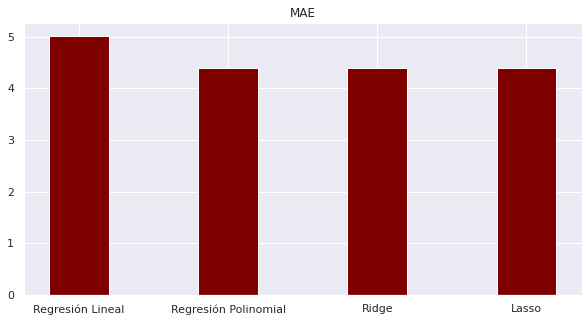

In [165]:
modelos_ejercicio1 = ['Regresión Lineal','Regresión Polinomial','Ridge','Lasso']

mae_values = list()
for i in range(0,len(modelos_ejercicio1)):
  mae_values.append(error_ejercicio1_test[i][0])

plt.figure(figsize = (10, 5))
plt.bar(modelos_ejercicio1, mae_values, color ='maroon', width = 0.4)
plt.title("MAE")

* R2 (de los cuatro métodos)

Text(0.5, 1.0, 'R2')

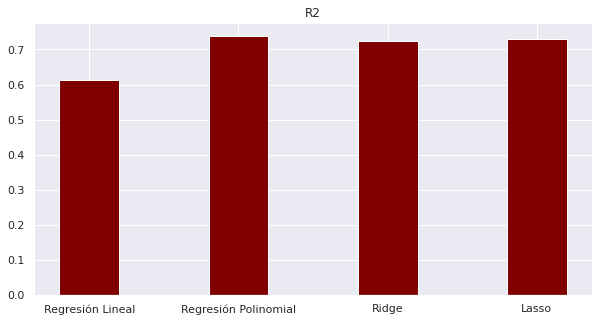

In [166]:
r2_values = list()
for i in range(0,len(modelos_ejercicio1)):
  r2_values.append(error_ejercicio1_test[i][2])

plt.figure(figsize = (10, 5))
plt.bar(modelos_ejercicio1, r2_values, color ='maroon', width = 0.4)
plt.title("R2")

### Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

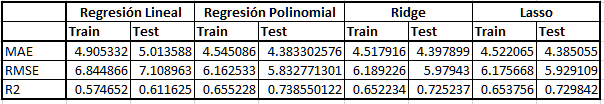

A primera vista, podemos ver que, para el valor de MAE, para todos menos para regresión lineal, sus valores disminuyen cuando se usan los datos de prueba. Para RMSE sucede lo mismo. Y para R2, en todos los modelos incrementa con los datos de prueba contra los de entrenamiento. Así mismo, el mejor valor de R2 es el de regresión lineal polinomial, así como de MAE y de RMSE. Por lo que se le recomienda a la empresa la regresión polinomial de grado 2. 

Veamos ahora sus errores:


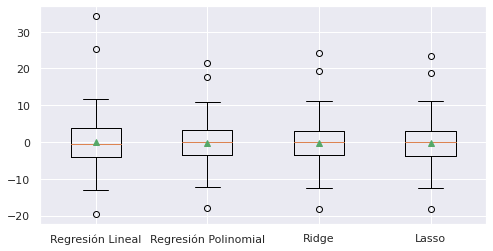

In [167]:
residuos_values = list()
for i in range(0,len(modelos_ejercicio1)):
  residuos_values.append(error_ejercicio1_test[i][3])

sns.set(rc={'figure.figsize':(8,4)})
plt.boxplot(residuos_values, labels=modelos_ejercicio1, showmeans=True)
plt.show()

Podemos observar que todos son muy similares, y con datos atípicos. Sin embargo, el de regresión lineal es que nos arroja los valores atípicos mas altos. Lo cual reafirma, considerando las métricas, que el mejor modelo a recomendar es el de regresión polinomial de grado 2. 

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [169]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16031,1786700080,20150115T000000,470000.0,4,2.50,2700,6769,2.0,0,0,...,9,2700,0,1999,0,98042,47.3753,-122.155,2880,7968
11916,9407000990,20141010T000000,239900.0,2,1.00,910,9000,1.0,0,0,...,6,910,0,1983,0,98045,47.4463,-121.771,1410,9440
7163,4354700010,20150421T000000,482500.0,3,2.00,1330,6490,1.0,0,0,...,7,1330,0,1954,0,98125,47.7181,-122.308,1580,7202
16954,1703050500,20150321T000000,645000.0,3,2.50,2490,5978,2.0,0,0,...,9,2490,0,2003,0,98074,47.6298,-122.022,2710,6629
2518,9412900045,20140519T000000,462000.0,3,1.50,1710,4500,1.5,0,0,...,8,1410,300,1928,0,98118,47.5366,-122.268,1860,6000
12999,1402600040,20140825T000000,330000.0,4,2.25,2430,7490,2.0,0,0,...,8,2430,0,1983,0,98058,47.4406,-122.139,2070,7469
18524,8807810090,20140925T000000,335000.0,3,1.00,1350,14212,1.0,0,0,...,6,1350,0,1981,0,98053,47.6606,-122.060,1520,14404
10015,1645000710,20150410T000000,255000.0,3,1.00,1140,8528,1.0,0,0,...,7,1140,0,1967,0,98022,47.2098,-122.004,1140,8112
18039,2571910100,20141029T000000,344000.0,4,2.50,2100,8501,2.0,0,0,...,7,2100,0,1993,0,98022,47.1951,-122.010,2130,8560
16579,984210170,20150326T000000,256500.0,5,2.50,1960,7350,1.0,0,0,...,7,1360,600,1969,0,98058,47.4368,-122.165,1900,7350


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [171]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [172]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


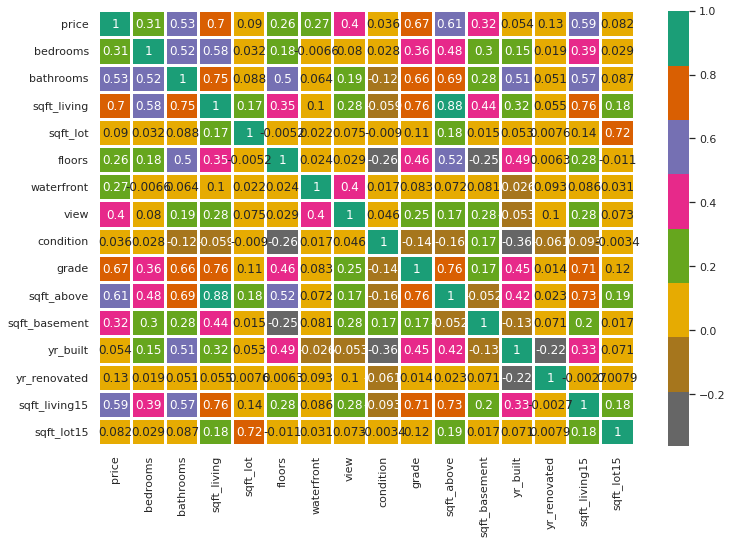

In [173]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [174]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

### Divide los datos. Utiliza la función train_test_split (ya esta en el notebook).

In [175]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


### Regresión Múltiple Lineal

Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

* Modelo generado (ecuación)

Entrenamos el modelo:

In [176]:
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

LinearRegression()

Obtenemos coeficientes e intercepción con el eje:

In [177]:
coef_inter(linear_reg)

Coeficientes: [[-3.82008048e+04  4.14661380e+04  1.07992584e+02  1.71356997e-02
   3.16916913e+04  5.52691023e+05  4.12493228e+04  2.12221443e+04
   1.19493216e+05  4.77750271e+01  6.02175565e+01 -3.55090216e+03
   1.32602215e+01  2.90059284e+01 -5.48132603e-01]]
Intercept: [6151359.2627409]


Obtenemos sus predicciones para datos de entrenamiento, y datos de prueba:

In [178]:
yhat_train, yhat_test = predict_ys(linear_reg, X_train, X_test)

* Visualización

No aplica ya que son múltiples variables de entrada

* Sus errores y r cuadrada

In [179]:
error_ejercicio1_train = list()
error_ejercicio1_test = list()

errores_test = list()
nom_errores = ['MAE', 'RMSE', 'R2']

errores_train = list()
errores_test = list()
errores_train, errores_test = errores(y_train,yhat_train,y_test,yhat_test)
error_ejercicio1_train.append(errores_train)
error_ejercicio1_test.append(errores_test)

i = 0
for error in nom_errores:
  print(error, 'de train:', errores_train[i])
  i = i + 1
i = 0
for error in nom_errores:
  print(error, 'de train:', errores_test[i])
  i = i + 1

MAE de train: 139269.32939115583
RMSE de train: 214234.8822754647
R2 de train: 0.6529196653133833
MAE de train: 137480.1388273178
RMSE de train: 232133.3676240749
R2 de train: 0.6579723205007814


### Regresión Múltiple Polinomial

Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

* Modelo generado (ecuación)

In [180]:
X_poly_train, X_poly_test = poly_transform(X, X_train, X_test, 2)

In [181]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly_train, y_train)

LinearRegression()

In [182]:
coef_inter(lin_reg)

Coeficientes: [[ 9.33912834e+05 -1.09330730e+06 -4.56449932e+02 -2.78686288e+01
  -2.07407238e+06 -3.95431870e+06 -2.88638026e+05  5.58697570e+05
   1.09864510e+06 -2.19758415e+02 -3.82034272e+02 -8.59630908e+04
  -2.95351595e+03  3.99965710e+03 -3.40106316e+01  9.57541696e+02
   7.49958190e+03 -1.37969466e+01 -1.84926695e-02  8.57699569e+03
  -1.14965893e+04 -3.06588900e+02 -5.24628836e+03 -5.36788065e+03
  -1.20757669e+00 -1.46068182e+01 -4.67099451e+02 -9.13191519e+00
   1.72800642e+01  2.15500198e-01 -9.63429892e+03  1.53879172e+01
  -1.35842369e-01 -2.59067293e+04  4.33707238e+04  3.82942459e+03
  -1.07592927e+03  2.22971689e+04  1.44292325e+01  1.33928361e+00
   5.03401980e+02 -1.70798805e+01 -1.72895923e+01 -5.56785248e-02
   1.56185890e+00 -4.34972758e+00  4.83299456e+00  1.60303193e+02
  -1.42711737e+01  1.31138593e+01  2.07283397e+01  2.61335089e+00
  -4.41381412e+00 -2.20765903e+00  6.36282684e-02  3.53629072e+00
   1.88176819e+01  3.06637958e-07  4.40839907e-01 -9.84216136e

Obtenemos sus predicciones para datos de entrenamiento, y datos de prueba:

In [183]:
yhat_train, yhat_test = predict_ys(lin_reg, X_poly_train, X_poly_test)

* Visualización

No aplica ya que son múltiples variables de entrada

* Sus errores y r cuadrada

In [184]:
errores_train = list()
errores_test = list()
errores_train, errores_test = errores(y_train,yhat_train,y_test,yhat_test)
error_ejercicio1_train.append(errores_train)
error_ejercicio1_test.append(errores_test)

i = 0
for error in nom_errores:
  print(error, 'de train:', errores_train[i])
  i = i + 1
i = 0
for error in nom_errores:
  print(error, 'de train:', errores_test[i])
  i = i + 1

MAE de train: 123190.80861039193
RMSE de train: 182926.52904652644
R2 de train: 0.7469519325162244
MAE de train: 121314.06948173394
RMSE de train: 186261.28575138954
R2 de train: 0.7797929072570198


### Ridge

* Modelo generado (ecuación)

In [185]:
X_poly_train, X_poly_test = poly_transform(X, X_train, X_test, 2)

In [186]:
ridge_model = Ridge(alpha = 10)
ridge_model.fit(X_poly_train, y_train)

Ridge(alpha=10)

In [187]:
coef_inter(ridge_model)

Coeficientes: [[ 9.26079225e+04 -3.16202656e+04 -2.89931541e+02 -2.88124732e+01
  -4.39153256e+04 -1.17042941e+04 -5.89524774e+04  5.01420732e+04
   7.56827400e+04 -2.99558271e+02 -2.31775846e+00 -9.65832516e+04
  -3.29982594e+03  4.27765913e+03 -3.32420023e+01  8.96760793e+02
   7.95999938e+02 -4.80522580e+00 -1.97093917e-02  3.97208378e+03
  -2.07692278e+04  2.45616536e+01 -8.57507708e+02 -5.81640632e+03
  -6.52845822e+00 -1.83927377e+01 -3.58726026e+01 -1.60738231e+00
   1.43659490e+01  1.83445781e-01 -3.28651083e+03  1.11513106e+01
  -1.34894590e-01 -1.29786747e+04  4.52180461e+04  4.43372310e+03
  -1.08031206e+04  1.48188309e+04  1.83498945e+01  4.86805884e+00
  -9.28847015e+00 -2.67947005e+01 -9.99201617e+00 -1.94914631e-02
   7.87817177e+00  5.80170911e+00  7.49164504e-01  1.52885346e+02
  -1.30912225e+01  1.15055021e+01  2.28938623e+01 -1.86192579e+00
  -1.08521677e+00 -4.30105398e+00  1.09371012e+01  2.79193593e+00
   5.08634683e+00  3.29499473e-07  4.59090888e-01 -6.96221095e

Obtenemos sus predicciones para datos de entrenamiento, y datos de prueba:

In [188]:
yhat_train, yhat_test = predict_ys(ridge_model, X_poly_train, X_poly_test)

* Visualización

No aplica ya que son múltiples variables de entrada

* Sus errores y r cuadrada

In [189]:
errores_train = list()
errores_test = list()
errores_train, errores_test = errores(y_train,yhat_train,y_test,yhat_test)
error_ejercicio1_train.append(errores_train)
error_ejercicio1_test.append(errores_test)

i = 0
for error in nom_errores:
  print(error, 'de train:', errores_train[i])
  i = i + 1
i = 0
for error in nom_errores:
  print(error, 'de train:', errores_test[i])
  i = i + 1

MAE de train: 123629.62442312554
RMSE de train: 183511.65311879775
R2 de train: 0.7453305020734993
MAE de train: 121631.23667354375
RMSE de train: 186020.93804955797
R2 de train: 0.7803608419298045


### Lasso

* Modelo generado (ecuación)

In [200]:
X_poly_train, X_poly_test = poly_transform(X, X_train, X_test, 1)

In [203]:
lasso_model = Lasso(alpha = 0.1, tol=0.001,max_iter=10000)
lasso_model.fit(X_poly_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.053e+14, tolerance: 2.572e+12
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso(alpha=0.1, max_iter=10000, tol=0.001)

In [204]:
coef_inter(lasso_model)

Coeficientes: [-3.82006778e+04  4.14657099e+04  2.93478924e+02  1.71349480e-02
  3.16912363e+04  5.52676032e+05  4.12498870e+04  2.12218689e+04
  1.19493078e+05 -1.37710845e+02 -1.25268594e+02 -3.55089695e+03
  1.32604839e+01  2.90058685e+01 -5.48132950e-01]
Intercept: [6151351.34785704]


Obtenemos sus predicciones para datos de entrenamiento, y datos de prueba:

In [205]:
yhat_train, yhat_test = predict_ys(lasso_model, X_poly_train, X_poly_test)

* Visualización

No aplica ya que son múltiples variables de entrada

In [216]:
len(yhat_train.ravel())

19451

* Sus errores y r cuadrada

In [221]:
errores_train = list()
errores_test = list()
errores_train, errores_test = errores(y_train,yhat_train.reshape(19451,1),y_test,yhat_test.reshape(2162,1))
error_ejercicio1_train.append(errores_train)
error_ejercicio1_test.append(errores_test)

i = 0
for error in nom_errores:
  print(error, 'de train:', errores_train[i])
  i = i + 1
i = 0
for error in nom_errores:
  print(error, 'de train:', errores_test[i])
  i = i + 1

MAE de train: 139269.330990337
RMSE de train: 214234.88227916526
R2 de train: 0.6529196653013929
MAE de train: 137480.18209947887
RMSE de train: 232133.48359030427
R2 de train: 0.6579719787690377


### Finalmente grafica

* MAE (de los cuatro métodos)

Text(0.5, 1.0, 'MAE')

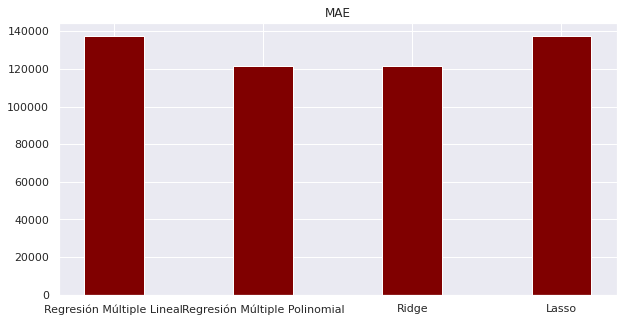

In [222]:
modelos_ejercicio1 = ['Regresión Múltiple Lineal','Regresión Múltiple Polinomial','Ridge','Lasso']

mae_values = list()
for i in range(0,len(modelos_ejercicio1)):
  mae_values.append(error_ejercicio1_test[i][0])

plt.figure(figsize = (10, 5))
plt.bar(modelos_ejercicio1, mae_values, color ='maroon', width = 0.4)
plt.title("MAE")

* R2 (de los cuatro métodos)

Text(0.5, 1.0, 'R2')

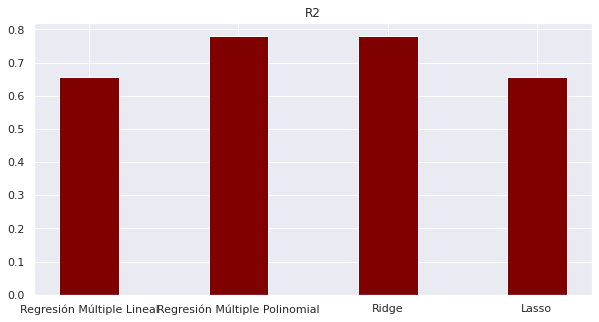

In [223]:
r2_values = list()
for i in range(0,len(modelos_ejercicio1)):
  r2_values.append(error_ejercicio1_test[i][2])

plt.figure(figsize = (10, 5))
plt.bar(modelos_ejercicio1, r2_values, color ='maroon', width = 0.4)
plt.title("R2")

### Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

A primera vista, podemos ver que, para el valor de MAE, para todos menos para regresión lineal, sus valores disminuyen cuando se usan los datos de prueba. Para RMSE sucede lo mismo. Y para R2, en todos los modelos incrementa con los datos de prueba contra los de entrenamiento. Así mismo, el mejor valor de R2 es el de regresión lineal polinomial, así como de MAE y de RMSE. Por lo que se le recomienda a la empresa la regresión polinomial de grado 2. 

Veamos ahora sus errores:


ValueError: ignored

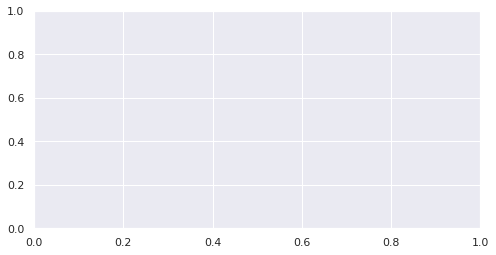

In [233]:
residuos_values = list()
for i in range(0,len(modelos_ejercicio1)-1):
  residuos_values.append(error_ejercicio1_test[i][3])

sns.set(rc={'figure.figsize':(8,4)})
plt.boxplot(residuos_values, labels=modelos_ejercicio1, showmeans=True)
plt.show()

In [237]:
residuos_values[0]

,price
3834,-147279.469284
1348,-112952.654035
20366,171240.639828
16617,-63586.864777
20925,-613.377067
...,...
13586,15434.533006
21221,-4463.908655
4016,120204.746030
5399,58262.212731


Podemos observar que todos son muy similares, y con datos atípicos. Sin embargo, el de regresión lineal es que nos arroja los valores atípicos mas altos. Lo cual reafirma, considerando las métricas, que el mejor modelo a recomendar es el de regresión polinomial de grado 2. 